
    
# Introduction to Genetic Programming in Python

    This notebook provides an introduction to genetic programming (GP) in Python, using the DEAP library. 
    We will cover basic concepts, set up the environment, and walk through a simple example.
    


## Setting Up the Environment

    First, we need to install the necessary Python library for genetic programming. 
    The DEAP library (Distributed Evolutionary Algorithms in Python) is a popular choice for its flexibility and ease of use.
    

In [4]:
%%capture
%pip install deap 


 ## Simple Genetic Programming Example

    We will start with a basic example of GP. Our goal is to evolve a population of individuals 
    to maximize the sum of their elements, which are binary in this case.
    

gen	nevals	avg    	min	max
0  	30    	24.1333	20 	30 
1  	21    	26.2   	21 	30 
2  	14    	28.1   	23 	32 
3  	20    	29.9667	26 	32 
4  	20    	31.2667	28 	36 
5  	14    	32.4   	31 	36 
6  	17    	33.3   	29 	36 
7  	11    	34.9   	33 	36 
8  	13    	35.1333	30 	36 
9  	17    	35.3667	31 	37 
10 	20    	36.2333	34 	38 
11 	19    	36.4   	33 	38 
12 	21    	37.2667	35 	39 
13 	12    	37.4   	34 	39 
14 	16    	38.1333	36 	41 
15 	18    	38.7   	37 	42 
16 	16    	39.5   	37 	42 
17 	15    	40.2333	37 	42 
18 	18    	40.9333	38 	42 
19 	23    	41.5   	38 	42 
20 	15    	41.5667	39 	43 
Best Individual:  [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1]]


/var/mobile/Containers/Data/Application/4D6E24EF-4F3E-4329-A53A-FBDB0E4C64AB/Library/lib/python3.11/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/var/mobile/Containers/Data/Application/4D6E24EF-4F3E-4329-A53A-FBDB0E4C64AB/Library/lib/python3.11/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


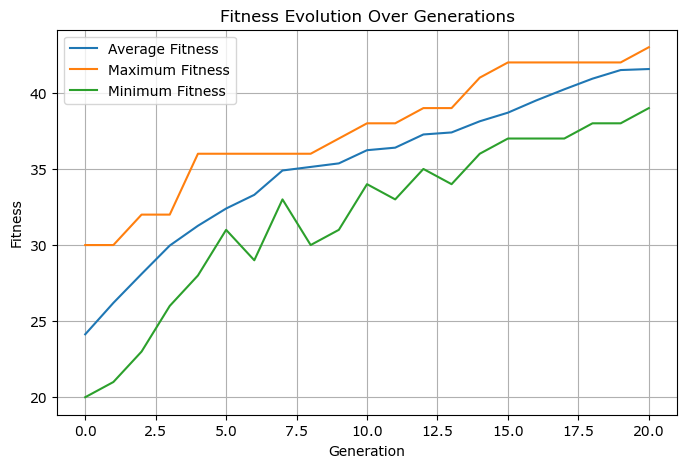

In [5]:
import random
from deap import base, creator, tools, algorithms
import matplotlib.pyplot as plt
import numpy

# Define Fitness Function
def eval_func(individual):
    return sum(individual),

# Create Types
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Initialize Toolbox
toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=50)  # Reduced n
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Register Operations
toolbox.register("evaluate", eval_func)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Visualization Function
def plot_evolution(log):
    # Extract statistics from log
    generations = log.select("gen")
    avg_fitness = log.select("avg")
    max_fitness = log.select("max")
    min_fitness = log.select("min")

    # Plotting the statistics
    plt.figure(figsize=(8, 5))  # Slightly smaller figure size
    plt.plot(generations, avg_fitness, label="Average Fitness")
    plt.plot(generations, max_fitness, label="Maximum Fitness")
    plt.plot(generations, min_fitness, label="Minimum Fitness")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.title("Fitness Evolution Over Generations")
    plt.legend()
    plt.grid(True)
    plt.show()

# Main Algorithm
def main():
    pop = toolbox.population(n=30)  # Reduced population size
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)

    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=20,  # Reduced generations
                                   stats=stats, halloffame=hof, verbose=True)
    return pop, log, hof

# Run the Genetic Algorithm and Visualize the Results
if __name__ == "__main__":
    results = main()
    print("Best Individual: ", results[2])
    plot_evolution(results[1])  # Visualize the evolution


    ## Further Reading and Resources

    To learn more about genetic programming, consider the following resources:
    - [Genetic Programming: An Introduction](https://www.amazon.com/Genetic-Programming-Introduction-Wolfgang-Banzhaf/dp/155860510X)
    - [DEAP Documentation](https://deap.readthedocs.io/)
    - Online courses and tutorials on genetic algorithms and programming.
    


## Conclusion

    This notebook is just a starting point. Experiment with different problems, settings, and DEAP's features 
    to deepen your understanding of genetic programming.
    